In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
rc('text', usetex=True)

In [2]:
res = 0.005

In [3]:
#mass = np.power(10,np.arange(0, 7.698970004336019, res))

mv  = 10.0**np.linspace(-9, -2, 140)

gees = 10**np.arange(-14.0, 0.0, res)
gets = 10**np.arange(-14.0, 0.0, res)

In [4]:
len(gets)

2800

## NA62

In [5]:
def gea_NA62(mz):
    return 2.23*1e-10*mz

gea_NA62_v = np.vectorize(gea_NA62)

In [6]:
gea_NA62_v_arr = gea_NA62_v(mv*1e9)

# DUNE

In [7]:
def gee_DUNE(mz):
    return 3.0*1e-10*mz

def get_DUNE(mz):
    return 1.9*1e-10*mz

gee_DUNE_v = np.vectorize(gee_DUNE)
get_DUNE_v = np.vectorize(get_DUNE)

In [8]:
gee_DUNE_v_arr = gee_DUNE_v(mv*1e9)
get_DUNE_v_arr = get_DUNE_v(mv*1e9)

# New params

In [12]:
def gee_faser_nu(mz):
    return 1.3*1e-8*mz

def get_faser_nu(mz):
    return 6.3*1e-9*mz

gee_faser_nu_v = np.vectorize(gee_faser_nu)
get_faser_nu_v = np.vectorize(get_faser_nu)

In [13]:
gee_faser_nu_v_arr = gee_faser_nu_v(mv*1e9)
get_faser_nu_v_arr = get_faser_nu_v(mv*1e9)

In [14]:
def gee_faser2_nu(mz):
    return 1.0*1e-9*mz

def get_faser2_nu(mz):
    return 4.1*1e-10*mz


gee_faser2_nu_v = np.vectorize(gee_faser2_nu)
get_faser2_nu_v = np.vectorize(get_faser2_nu)

In [15]:
gee_faser2_nu_v_arr = gee_faser2_nu_v(mv*1e9)
get_faser2_nu_v_arr = get_faser2_nu_v(mv*1e9)

In [50]:
def gee_faser_future_nu(mz):
    return 5.9*1e-10*mz

def get_faser_future_nu(mz):
    return 1.6*1e-10*mz


gee_faser_future_nu_v = np.vectorize(gee_faser_future_nu)
get_faser_future_nu_v = np.vectorize(get_faser_future_nu)

In [51]:
gee_faser_future_nu_v_arr = gee_faser_future_nu_v(mv*1e9)
get_faser_future_nu_v_arr = get_faser_future_nu_v(mv*1e9)

# $N_{eff}$

In [20]:
N_eff = np.loadtxt("N_effective.csv", delimiter=",")
N_eff = 10**N_eff
N_eff[:,0] = N_eff[:,0]*1e6
# N_eff = N_eff[:-5]

In [10]:
def chi2_gee(SM_anu_e,
             SM_nu_e,
             BSM_nu_e_mu_gee,
             BSM_anu_e_mu_gee,
             gee,
             n_faser):
    
    SM_anu_e = n_faser * SM_anu_e
    SM_nu_e = n_faser * SM_nu_e
    BSM_nu_e_mu_gee = n_faser * BSM_nu_e_mu_gee
    BSM_anu_e_mu_gee = n_faser * BSM_anu_e_mu_gee
    
    # chi nu
    thrd_num = 10
    chi_nu = 0.0
    for i in range(len(SM_nu_e)):
        if SM_nu_e[i] !=  0:
            if SM_nu_e[i] < thrd_num:
                noe_th = (gee**2)*BSM_nu_e_mu_gee[i] + SM_nu_e[i]
                chi_nu += 2*(noe_th - SM_nu_e[i] + SM_nu_e[i]*np.log(SM_nu_e[i]/noe_th))
            elif SM_nu_e[i] >= thrd_num:
                chi_nu += (gee**4)*BSM_nu_e_mu_gee[i]**2/SM_nu_e[i] 
    
    # chi anu
    chi_anu = 0.0
    for i in range(len(SM_anu_e)):
        if SM_anu_e[i] !=  0:
            if SM_anu_e[i] < thrd_num:
                noe_th = (gee**2)*BSM_anu_e_mu_gee[i] + SM_anu_e[i]
                chi_anu += 2*(noe_th - SM_anu_e[i] + SM_anu_e[i]*np.log(SM_anu_e[i]/noe_th))
            elif SM_anu_e[i] >= thrd_num:
                chi_anu += (gee**4)*BSM_anu_e_mu_gee[i]**2/SM_anu_e[i]
                
    return chi_anu + chi_nu

In [11]:
def chi2_get(SM_anu_e,
             SM_nu_e,
             SM_anu_tau,
             SM_nu_tau,
             BSM_nu_e_mu_get,
             BSM_anu_e_mu_get,
             BSM_nu_tau_mu_get,
             BSM_anu_tau_mu_get,
             get,
             n_faser):
    
    SM_anu_e = n_faser * SM_anu_e
    SM_nu_e = n_faser * SM_nu_e

    SM_anu_tau = n_faser * SM_anu_tau
    SM_nu_tau = n_faser * SM_nu_tau
    
    BSM_nu_e_mu_get = n_faser * BSM_nu_e_mu_get
    BSM_anu_e_mu_get = n_faser * BSM_anu_e_mu_get
    
    BSM_nu_tau_mu_get = n_faser * BSM_nu_tau_mu_get
    BSM_anu_tau_mu_get = n_faser * BSM_anu_tau_mu_get
    
    # chi nu
    thrd_num = 10
    chi_nu = 0.0
    for i in range(len(SM_nu_e)):
        if SM_nu_e[i] !=  0:
            if SM_nu_e[i] < thrd_num:
                noe_th_e = (get**2)*BSM_nu_e_mu_get[i] + SM_nu_e[i]
                chi_nu += 2*(noe_th_e - SM_nu_e[i] + SM_nu_e[i]*np.log(SM_nu_e[i]/noe_th_e)) 
            elif SM_nu_e[i] >= thrd_num:
                chi_nu += (get**4)*BSM_nu_e_mu_get[i]**2/SM_nu_e[i] 
          
        if SM_nu_tau[i] !=  0:
            if SM_nu_tau[i] < thrd_num:
                noe_th_tau = (get**2)*BSM_nu_tau_mu_get[i] + SM_nu_tau[i]
                chi_nu += 2*(noe_th_tau - SM_nu_tau[i] + SM_nu_tau[i]*np.log(SM_nu_tau[i]/noe_th_tau))
            elif SM_nu_tau[i] >= thrd_num:
                chi_nu += (get**4)*BSM_nu_tau_mu_get[i]**2/SM_nu_tau[i]
     
    # chi anu
    chi_anu = 0.0
    for i in range(len(SM_anu_e)):
        if SM_anu_e[i] !=  0:
            if SM_anu_e[i] < thrd_num:
                noe_th_e = (get**2)*BSM_anu_e_mu_get[i] + SM_anu_e[i]
                chi_anu += 2*(noe_th_e - SM_anu_e[i] + SM_anu_e[i]*np.log(SM_anu_e[i]/noe_th_e)) 
            elif SM_anu_e[i] >= thrd_num:
                chi_anu += (get**4)*BSM_anu_e_mu_get[i]**2/SM_anu_e[i] 
          
        if SM_anu_tau[i] !=  0:
            if SM_anu_tau[i] < thrd_num:
                noe_th_tau = (get**2)*BSM_anu_tau_mu_get[i] + SM_anu_tau[i]
                chi_anu += 2*(noe_th_tau - SM_anu_tau[i] + SM_anu_tau[i]*np.log(SM_anu_tau[i]/noe_th_tau))
            elif SM_anu_tau[i] >= thrd_num:
                chi_anu += (get**4)*BSM_anu_tau_mu_get[i]**2/SM_anu_tau[i]
                
    return chi_anu + chi_nu

# $N_{faser}$ = 10000000
# $g_{ee}$

In [12]:
n_faser1 = 1
n_faser20000 = 20000
n_faser200000 = 200000

In [13]:
chi2gee1 = []


chi2gee1_gees = []

for i in mv:
    for gee in gees:
        
        if gee*(i)*1e9> 1:
            output = './wiz/'
        else:
            output = './noz/'
            

        number = '%e'%i

        SM_anu_e_path = output + "mV=1.000000e-02_NOE_SM_anu_e.txt"
        SM_anu_tau_path = output + "mV=1.000000e-02_NOE_SM_anu_tau.txt"

        SM_nu_e_path = output + "mV=1.000000e-02_NOE_SM_nu_e.txt"
        SM_nu_tau_path = output + "mV=1.000000e-02_NOE_SM_nu_tau.txt"


        BSM_anu_e_mu_gee_path = output + "mV=%s_NOE_BSM_anu_e_mu_gee.txt"%number
        BSM_anu_e_mu_get_path = output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number
        BSM_anu_tau_mu_get_path = output + "mV=%s_NOE_BSM_anu_tau_mu_get.txt"%number

        BSM_nu_e_mu_gee_path = output + "mV=%s_NOE_BSM_nu_e_mu_gee.txt"%number
        BSM_nu_e_mu_get_path = output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number
        BSM_nu_tau_mu_get_path = output + "mV=%s_NOE_BSM_nu_tau_mu_get.txt"%number

        # gee

        SM_anu_e = np.loadtxt(SM_anu_e_path)
        SM_nu_e = np.loadtxt(SM_nu_e_path)


        BSM_nu_e_mu_gee = np.loadtxt(BSM_nu_e_mu_gee_path)
        BSM_anu_e_mu_gee = np.loadtxt(BSM_anu_e_mu_gee_path)



        chi2gee1_gees.append(chi2_gee(SM_anu_e, SM_nu_e, BSM_nu_e_mu_gee, BSM_anu_e_mu_gee, gee, n_faser1 ))
    chi2gee1.append(chi2gee1_gees)
    chi2gee1_gees = []
    

In [14]:
chi2gee20000 = []




chi2gee20000_gees = []

for i in mv:
    for gee in gees:
        
        if gee*(i)*1e9> 1:
            output = './wiz/'
        else:
            output = './noz/'
            

        number = '%e'%i

        SM_anu_e_path = output + "mV=1.000000e-02_NOE_SM_anu_e.txt"
        SM_anu_tau_path = output + "mV=1.000000e-02_NOE_SM_anu_tau.txt"

        SM_nu_e_path = output + "mV=1.000000e-02_NOE_SM_nu_e.txt"
        SM_nu_tau_path = output + "mV=1.000000e-02_NOE_SM_nu_tau.txt"


        BSM_anu_e_mu_gee_path = output + "mV=%s_NOE_BSM_anu_e_mu_gee.txt"%number
        BSM_anu_e_mu_get_path = output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number
        BSM_anu_tau_mu_get_path = output + "mV=%s_NOE_BSM_anu_tau_mu_get.txt"%number

        BSM_nu_e_mu_gee_path = output + "mV=%s_NOE_BSM_nu_e_mu_gee.txt"%number
        BSM_nu_e_mu_get_path = output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number
        BSM_nu_tau_mu_get_path = output + "mV=%s_NOE_BSM_nu_tau_mu_get.txt"%number

        # gee

        SM_anu_e = np.loadtxt(SM_anu_e_path)
        SM_nu_e = np.loadtxt(SM_nu_e_path)


        BSM_nu_e_mu_gee = np.loadtxt(BSM_nu_e_mu_gee_path)
        BSM_anu_e_mu_gee = np.loadtxt(BSM_anu_e_mu_gee_path)



        chi2gee20000_gees.append(chi2_gee(SM_anu_e, SM_nu_e, BSM_nu_e_mu_gee, BSM_anu_e_mu_gee, gee, n_faser20000 ))
    chi2gee20000.append(chi2gee20000_gees)
    chi2gee20000_gees = []

In [15]:
chi2gee200000 = []




chi2gee200000_gees = []

for i in mv:
    for gee in gees:
        
        if gee*(i)*1e9> 1:
            output = './wiz/'
        else:
            output = './noz/'
            

        number = '%e'%i

        SM_anu_e_path = output + "mV=1.000000e-02_NOE_SM_anu_e.txt"
        SM_anu_tau_path = output + "mV=1.000000e-02_NOE_SM_anu_tau.txt"

        SM_nu_e_path = output + "mV=1.000000e-02_NOE_SM_nu_e.txt"
        SM_nu_tau_path = output + "mV=1.000000e-02_NOE_SM_nu_tau.txt"


        BSM_anu_e_mu_gee_path = output + "mV=%s_NOE_BSM_anu_e_mu_gee.txt"%number
        BSM_anu_e_mu_get_path = output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number
        BSM_anu_tau_mu_get_path = output + "mV=%s_NOE_BSM_anu_tau_mu_get.txt"%number

        BSM_nu_e_mu_gee_path = output + "mV=%s_NOE_BSM_nu_e_mu_gee.txt"%number
        BSM_nu_e_mu_get_path = output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number
        BSM_nu_tau_mu_get_path = output + "mV=%s_NOE_BSM_nu_tau_mu_get.txt"%number

        # gee

        SM_anu_e = np.loadtxt(SM_anu_e_path)
        SM_nu_e = np.loadtxt(SM_nu_e_path)


        BSM_nu_e_mu_gee = np.loadtxt(BSM_nu_e_mu_gee_path)
        BSM_anu_e_mu_gee = np.loadtxt(BSM_anu_e_mu_gee_path)



        chi2gee200000_gees.append(chi2_gee(SM_anu_e, SM_nu_e, BSM_nu_e_mu_gee, BSM_anu_e_mu_gee, gee, n_faser200000 ))
    chi2gee200000.append(chi2gee200000_gees)
    chi2gee200000_gees = []

In [16]:
chi2gee1 = np.array(chi2gee1)
chi2gee20000 = np.array(chi2gee20000)
chi2gee200000 = np.array(chi2gee200000)

In [30]:
np.savetxt("chi2_gee_n1.txt", chi2gee1)
np.savetxt("chi2_gee_n20000.txt", chi2gee20000)
np.savetxt("chi2_gee_n200000.txt", chi2gee200000)

In [18]:
chi2gee1 = np.loadtxt("chi2_gee_n1.txt")
chi2gee20000 = np.loadtxt("chi2_gee_n20000.txt")
chi2gee200000 = np.loadtxt("chi2_gee_n200000.txt")

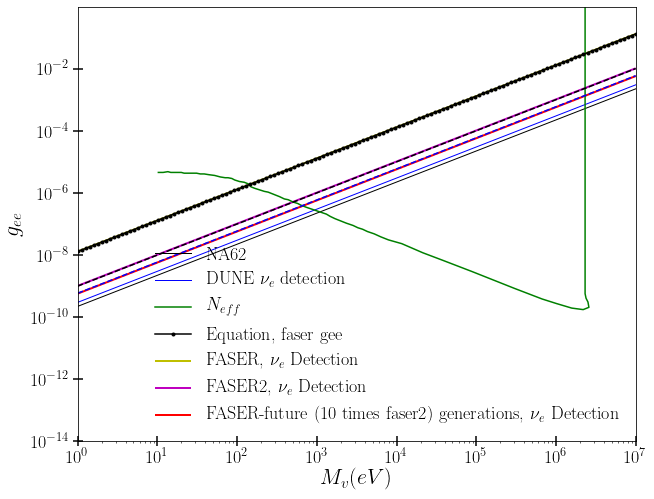

In [42]:
#%matplotlib qt
%matplotlib inline 

label_size = 22
tick_size = 18
ticks_font = 'Calibri'
fig, ax = plt.subplots(figsize=(10,8))


mvs = mv*1e9

#===================================

y , x = np.meshgrid(gees, mvs)
CS1 = ax.contour(x, y , chi2gee1, colors = 'y', linewidths = 2, levels =  [2.7]) 
#ax.clabel(CS1, inline=1, fontsize=label_size-2)

    
#===================================


CS20000 = ax.contour(x, y , chi2gee20000, colors = 'm', linewidths = 2, levels =  [2.7]) 
#ax.clabel(CS20000, inline=1, fontsize=label_size-2)


    
#===================================


CS200000 = ax.contour(x, y , chi2gee200000, colors = 'r', linewidths = 2, levels =  [2.7]) 
#ax.clabel(CS200000, inline=1, fontsize=label_size-2)


#==================================
 
NAS2, = ax.plot(mvs,gea_NA62_v_arr, 'k', linewidth=1, label="NA62")
Doone, = ax.plot(mvs,gee_DUNE_v_arr, 'b', linewidth=1, label=r"DUNE $\nu_e$ detection")
Cosmo, = ax.plot(N_eff[:,0], N_eff[:,1], 'g', label=r"$N_{eff}$")
fasernu, = ax.plot(mvs,gee_faser_nu_v_arr, 'k.-', label=r"faser $\nu$")
fasernu2, = ax.plot(mvs,gee_faser2_nu_v_arr, 'k--', label=r"faser2 $\nu$")
fasernuf, = ax.plot(mvs,gee_faser_future_nu_v_arr, 'b--', label=r"faser 10 times $\nu$")


lines = [NAS2,
         Doone,
         Cosmo,
         fasernu,
         CS1.collections[-1],         
         CS20000.collections[-1],
         CS200000.collections[-1]]

labels = ["NA62",
         r"DUNE $\nu_e$ detection",
          r"$N_{eff}$", 
          r"Equation, faser gee",
          r'FASER, $\nu_{e}$ Detection',
          r'FASER2, $\nu_{e}$ Detection',
          r'FASER-future (10 times faser2) generations, $\nu_{e}$ Detection']



plt.legend(lines, labels, loc=0, frameon=False, fontsize = label_size-4)
#plt.legend(loc='lower right', frameon=True, fontsize = label_size-2)

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel(r"$M_v (eV)$", fontsize = label_size)
ax.set_ylabel(r"$g_{ee}$", fontsize = label_size)

ax.tick_params(which = 'major', axis='both', direction = 'inout', length=10,  width = 1.5)


for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
  
ax.set_xscale('log')
ax.set_yscale('log')
    
# ax.set_xlim(1e4, 0.5*1e7)
# ax.set_ylim(0.0001, 0.004)


plt.savefig("./Large_Mass_gee_n_fasers.pdf")

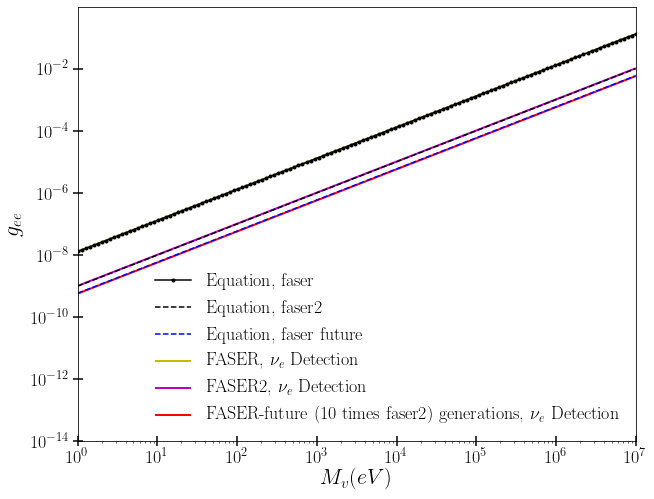

In [52]:
#%matplotlib qt
%matplotlib inline 

label_size = 22
tick_size = 18
ticks_font = 'Calibri'
fig, ax = plt.subplots(figsize=(10,8))


mvs = mv*1e9

#===================================

y , x = np.meshgrid(gees, mvs)
CS1 = ax.contour(x, y , chi2gee1, colors = 'y', linewidths = 2, levels =  [2.7]) 
#ax.clabel(CS1, inline=1, fontsize=label_size-2)

    
#===================================


CS20000 = ax.contour(x, y , chi2gee20000, colors = 'm', linewidths = 2, levels =  [2.7]) 
#ax.clabel(CS20000, inline=1, fontsize=label_size-2)


    
#===================================


CS200000 = ax.contour(x, y , chi2gee200000, colors = 'r', linewidths = 2, levels =  [2.7]) 
#ax.clabel(CS200000, inline=1, fontsize=label_size-2)


#==================================

fasernu, = ax.plot(mvs,gee_faser_nu_v_arr, 'k.-', label=r"faser $\nu$")
fasernu2, = ax.plot(mvs,gee_faser2_nu_v_arr, 'k--', label=r"faser2 $\nu$")
fasernuf, = ax.plot(mvs,gee_faser_future_nu_v_arr, 'b--', label=r"faser 10 times $\nu$")


lines = [fasernu,
         fasernu2,
         fasernuf,
         CS1.collections[-1],         
         CS20000.collections[-1],
         CS200000.collections[-1]]

labels = [
          r"Equation, faser",
          r"Equation, faser2",
          r"Equation, faser future",
          r'FASER, $\nu_{e}$ Detection',
          r'FASER2, $\nu_{e}$ Detection',
          r'FASER-future (10 times faser2) generations, $\nu_{e}$ Detection']



plt.legend(lines, labels, loc=0, frameon=False, fontsize = label_size-4)
#plt.legend(loc='lower right', frameon=True, fontsize = label_size-2)

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel(r"$M_v (eV)$", fontsize = label_size)
ax.set_ylabel(r"$g_{ee}$", fontsize = label_size)

ax.tick_params(which = 'major', axis='both', direction = 'inout', length=10,  width = 1.5)


for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
  
ax.set_xscale('log')
ax.set_yscale('log')
    
# ax.set_xlim(1e4, 0.5*1e7)
# ax.set_ylim(0.0001, 0.004)


plt.savefig("./1.6_your_formula_gee_n_fasers.pdf")

# $N_{faser} = 200000$
# $g_{et}$

In [18]:
n1_faser = 1

In [19]:
chi2get1 = []
    

chi2get1_gets = []



for i in mv:
    for get in gets:
        
        if get*(i)*1e9> 1:
            output = './wiz/'
        else:
            output = './noz/'
            

        number = '%e'%i        



        SM_anu_e_path = output + "mV=1.000000e-02_NOE_SM_anu_e.txt"
        SM_anu_tau_path = output + "mV=1.000000e-02_NOE_SM_anu_tau.txt"

        SM_nu_e_path = output + "mV=1.000000e-02_NOE_SM_nu_e.txt"
        SM_nu_tau_path = output + "mV=1.000000e-02_NOE_SM_nu_tau.txt"


        BSM_anu_e_mu_get_path = output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number
        BSM_anu_e_mu_get_path = output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number
        BSM_anu_tau_mu_get_path = output + "mV=%s_NOE_BSM_anu_tau_mu_get.txt"%number

        BSM_nu_e_mu_get_path = output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number
        BSM_nu_e_mu_get_path = output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number
        BSM_nu_tau_mu_get_path = output + "mV=%s_NOE_BSM_nu_tau_mu_get.txt"%number

        # get

        SM_anu_tau = np.loadtxt(SM_anu_tau_path)
        SM_nu_tau = np.loadtxt(SM_nu_tau_path)

        BSM_nu_tau_mu_get = np.loadtxt(BSM_nu_tau_mu_get_path)
        BSM_anu_tau_mu_get = np.loadtxt(BSM_anu_tau_mu_get_path)

        BSM_nu_e_mu_get = np.loadtxt(BSM_nu_e_mu_get_path)
        BSM_anu_e_mu_get = np.loadtxt(BSM_anu_e_mu_get_path)




        chi2get1_gets.append(chi2_get(SM_anu_e, SM_nu_e, SM_anu_tau, SM_nu_tau, BSM_nu_e_mu_get, BSM_anu_e_mu_get, BSM_nu_tau_mu_get, BSM_anu_tau_mu_get, get, n1_faser ))
    chi2get1.append(chi2get1_gets)
    chi2get1_gets = []
    

In [20]:
n20000_faser = 20000

In [21]:
chi2get20000 = []
    

chi2get20000_gets = []



for i in mv:
    for get in gets:
        
        if get*(i)*1e9> 1:
            output = './wiz/'
        else:
            output = './noz/'
            

        number = '%e'%i        



        SM_anu_e_path = output + "mV=1.000000e-02_NOE_SM_anu_e.txt"
        SM_anu_tau_path = output + "mV=1.000000e-02_NOE_SM_anu_tau.txt"

        SM_nu_e_path = output + "mV=1.000000e-02_NOE_SM_nu_e.txt"
        SM_nu_tau_path = output + "mV=1.000000e-02_NOE_SM_nu_tau.txt"


        BSM_anu_e_mu_get_path = output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number
        BSM_anu_e_mu_get_path = output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number
        BSM_anu_tau_mu_get_path = output + "mV=%s_NOE_BSM_anu_tau_mu_get.txt"%number

        BSM_nu_e_mu_get_path = output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number
        BSM_nu_e_mu_get_path = output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number
        BSM_nu_tau_mu_get_path = output + "mV=%s_NOE_BSM_nu_tau_mu_get.txt"%number

        # get

        SM_anu_tau = np.loadtxt(SM_anu_tau_path)
        SM_nu_tau = np.loadtxt(SM_nu_tau_path)

        BSM_nu_tau_mu_get = np.loadtxt(BSM_nu_tau_mu_get_path)
        BSM_anu_tau_mu_get = np.loadtxt(BSM_anu_tau_mu_get_path)

        BSM_nu_e_mu_get = np.loadtxt(BSM_nu_e_mu_get_path)
        BSM_anu_e_mu_get = np.loadtxt(BSM_anu_e_mu_get_path)




        chi2get20000_gets.append(chi2_get(SM_anu_e, SM_nu_e, SM_anu_tau, SM_nu_tau, BSM_nu_e_mu_get, BSM_anu_e_mu_get, BSM_nu_tau_mu_get, BSM_anu_tau_mu_get, get, n20000_faser ))
    chi2get20000.append(chi2get20000_gets)
    chi2get20000_gets = []
    

In [22]:
n200000_faser = 200000

In [23]:
chi2get200000 = []
    

chi2get200000_gets = []



for i in mv:
    for get in gets:
        
        if get*(i)*1e9> 1:
            output = './wiz/'
        else:
            output = './noz/'
            

        number = '%e'%i        



        SM_anu_e_path = output + "mV=1.000000e-02_NOE_SM_anu_e.txt"
        SM_anu_tau_path = output + "mV=1.000000e-02_NOE_SM_anu_tau.txt"

        SM_nu_e_path = output + "mV=1.000000e-02_NOE_SM_nu_e.txt"
        SM_nu_tau_path = output + "mV=1.000000e-02_NOE_SM_nu_tau.txt"


        BSM_anu_e_mu_get_path = output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number
        BSM_anu_e_mu_get_path = output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number
        BSM_anu_tau_mu_get_path = output + "mV=%s_NOE_BSM_anu_tau_mu_get.txt"%number

        BSM_nu_e_mu_get_path = output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number
        BSM_nu_e_mu_get_path = output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number
        BSM_nu_tau_mu_get_path = output + "mV=%s_NOE_BSM_nu_tau_mu_get.txt"%number

        # get

        SM_anu_tau = np.loadtxt(SM_anu_tau_path)
        SM_nu_tau = np.loadtxt(SM_nu_tau_path)

        BSM_nu_tau_mu_get = np.loadtxt(BSM_nu_tau_mu_get_path)
        BSM_anu_tau_mu_get = np.loadtxt(BSM_anu_tau_mu_get_path)

        BSM_nu_e_mu_get = np.loadtxt(BSM_nu_e_mu_get_path)
        BSM_anu_e_mu_get = np.loadtxt(BSM_anu_e_mu_get_path)




        chi2get200000_gets.append(chi2_get(SM_anu_e, SM_nu_e, SM_anu_tau, SM_nu_tau, BSM_nu_e_mu_get, BSM_anu_e_mu_get, BSM_nu_tau_mu_get, BSM_anu_tau_mu_get, get, n200000_faser ))
    chi2get200000.append(chi2get200000_gets)
    chi2get200000_gets = []
    

In [36]:
chi2get1 = np.array(chi2get1)

NameError: name 'chi2get1' is not defined

In [25]:
chi2get20000 = np.array(chi2get20000)

In [26]:
chi2get200000 = np.array(chi2get200000)

In [33]:
np.savetxt("chi2_get_n1.txt", chi2get1)
np.savetxt("chi2_get_n20000.txt", chi2get20000)
np.savetxt("chi2_get_n200000.txt", chi2get200000)

In [37]:
chi2get1 = np.loadtxt("chi2_get_n1.txt")
chi2get20000 = np.loadtxt("chi2_get_n20000.txt")
chi2get200000 = np.loadtxt("chi2_get_n200000.txt")

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


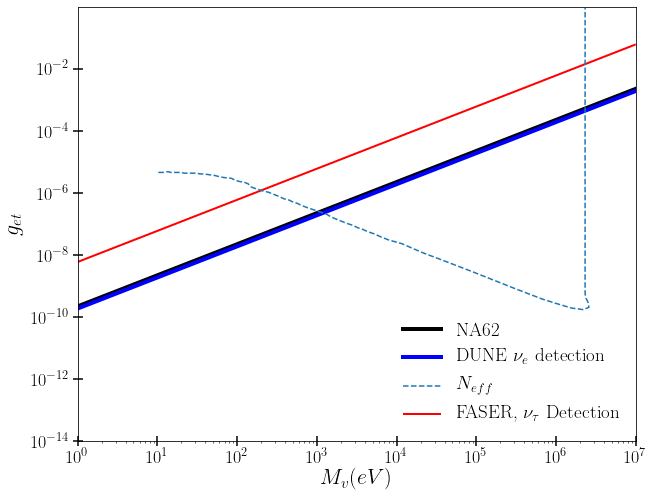

In [38]:
#%matplotlib qt
%matplotlib inline 

label_size = 22
tick_size = 18
ticks_font = 'Calibri'
fig, ax = plt.subplots(figsize=(10,8))



mvs = mv*1e9



#===================================

y , x = np.meshgrid(gets, mvs)
CS1 = ax.contour(x, y , chi2get1, colors = 'r', linewidths = 2, levels =  [2.7],) 
#ax.clabel(CS1, inline=1, fontsize=label_size-2)

    
#===================================


#CS20000 = ax.contour(x, y , chi2get20000, colors = 'b', linewidths = 2, levels =  [2.7]) 
#ax.clabel(CS20000, inline=1, fontsize=label_size-2)


    
#===================================

# y , x = np.meshgrid(gets, mvs)
# CS200000 = ax.contour(x, y , chi2get200000, colors = 'r', linewidths = 2, levels =  [2.7]) 
#ax.clabel(CS200000, inline=1, fontsize=label_size-2)


#==================================



NAS2, = ax.plot(mvs,gea_NA62_v_arr[mv<=0.016480331], 'k', linewidth=4, label="NA62")
Doone, = ax.plot(mvs,get_DUNE_v_arr[mv<=0.016480331], 'b', linewidth=4, label=r"DUNE $\nu_e$ detection")
Cosmo, = ax.plot(N_eff[:,0], N_eff[:,1], '--', label=r"$N_{eff}$")
lines = [NAS2,
         Doone,
         Cosmo,
         CS1.collections[-1],
         #CS20000.collections[-1],
         #CS200000.collections[-1]
        ]

labels = ["NA62",
          r"DUNE $\nu_e$ detection",
          r"$N_{eff}$",
          r'FASER, $\nu_{\tau}$ Detection'
          #r'FASER2, $\nu_{\tau}$ Detection',
          #r'FASER, future generations $\nu_{\tau}$ Detection'
         ]



plt.legend(lines, labels, loc='lower right', frameon=False, fontsize = label_size-3)
#plt.legend(loc='lower right', frameon=True, fontsize = label_size-2)

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel(r"$M_v (eV)$", fontsize = label_size)
ax.set_ylabel(r"$g_{et}$", fontsize = label_size)

ax.tick_params(which = 'major', axis='both', direction = 'inout', length=10,  width = 1.5)


for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
    

ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim(0.001, 0.04)


plt.savefig("./Large_Mass_get_n_faser=1.pdf")

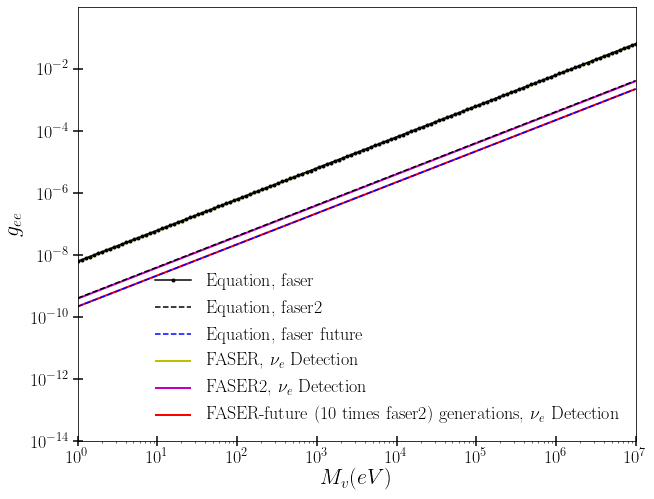

In [39]:
#%matplotlib qt
%matplotlib inline 

label_size = 22
tick_size = 18
ticks_font = 'Calibri'
fig, ax = plt.subplots(figsize=(10,8))


mvs = mv*1e9

#===================================

y , x = np.meshgrid(gets, mvs)
CS1 = ax.contour(x, y , chi2get1, colors = 'y', linewidths = 2, levels =  [2.7]) 
#ax.clabel(CS1, inline=1, fontsize=label_size-2)

    
#===================================


CS20000 = ax.contour(x, y , chi2get20000, colors = 'm', linewidths = 2, levels =  [2.7]) 
#ax.clabel(CS20000, inline=1, fontsize=label_size-2)


    
#===================================


CS200000 = ax.contour(x, y , chi2get200000, colors = 'r', linewidths = 2, levels =  [2.7]) 
#ax.clabel(CS200000, inline=1, fontsize=label_size-2)


#==================================

fasernu, = ax.plot(mvs,get_faser_nu_v_arr, 'k.-', label=r"faser $\nu$")
fasernu2, = ax.plot(mvs,get_faser2_nu_v_arr, 'k--', label=r"faser2 $\nu$")
fasernuf, = ax.plot(mvs,get_faser_future_nu_v_arr, 'b--', label=r"faser 10 times $\nu$")


lines = [fasernu,
         fasernu2,
         fasernuf,
         CS1.collections[-1],         
         CS20000.collections[-1],
         CS200000.collections[-1]]

labels = [
          r"Equation, faser",
          r"Equation, faser2",
          r"Equation, faser future",
          r'FASER, $\nu_{e}$ Detection',
          r'FASER2, $\nu_{e}$ Detection',
          r'FASER-future (10 times faser2) generations, $\nu_{e}$ Detection']



plt.legend(lines, labels, loc=0, frameon=False, fontsize = label_size-4)
#plt.legend(loc='lower right', frameon=True, fontsize = label_size-2)

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel(r"$M_v (eV)$", fontsize = label_size)
ax.set_ylabel(r"$g_{ee}$", fontsize = label_size)

ax.tick_params(which = 'major', axis='both', direction = 'inout', length=10,  width = 1.5)


for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
  
ax.set_xscale('log')
ax.set_yscale('log')
    
# ax.set_xlim(1e4, 0.5*1e7)
# ax.set_ylim(0.0001, 0.004)


plt.savefig("./your_formula_get_n_fasers.pdf")

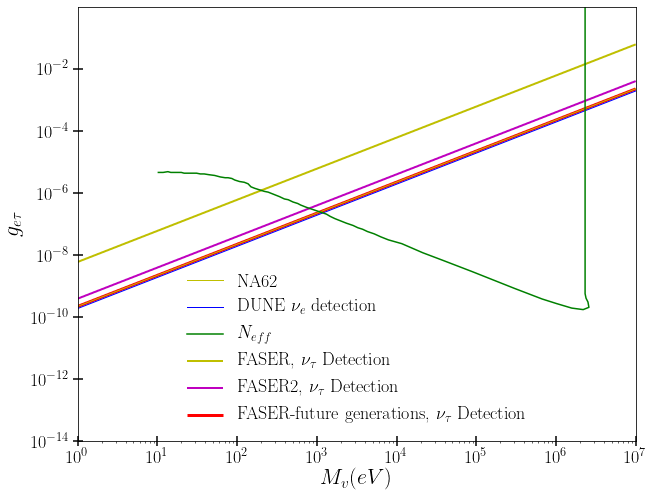

In [46]:
#%matplotlib qt
%matplotlib inline 

label_size = 22
tick_size = 18
ticks_font = 'Calibri'
fig, ax = plt.subplots(figsize=(10,8))




#===================================

y , x = np.meshgrid(gets, mvs)
CS1 = ax.contour(x, y , chi2get1, colors = 'y', linewidths = 2, levels =  [2.7]) 
#ax.clabel(CS1, inline=1, fontsize=label_size-2)

    
#===================================


CS20000 = ax.contour(x, y , chi2get20000, colors = 'm', linewidths = 2, levels =  [2.7]) 
#ax.clabel(CS20000, inline=1, fontsize=label_size-2)


    
#===================================


CS200000 = ax.contour(x, y , chi2get200000, colors = 'r', linewidths = 3, levels =  [2.7]) 
#ax.clabel(CS200000, inline=1, fontsize=label_size-2)


#==================================
 
NAS2, = ax.plot(mvs,gea_NA62_v_arr, 'y', linewidth=1, label="NA62")
Doone, = ax.plot(mvs,get_DUNE_v_arr, 'b', linewidth=1, label=r"DUNE $\nu_e$ detection")
Cosmo, = ax.plot(N_eff[:,0], N_eff[:,1], 'g', label=r"$N_{eff}$")
lines = [NAS2,
         Doone,
         Cosmo,
         CS1.collections[-1],         
         CS20000.collections[-1],
         CS200000.collections[-1]]

labels = ["NA62",
         r"DUNE $\nu_e$ detection",
          r"$N_{eff}$",          
          r'FASER, $\nu_{\tau}$ Detection',
          r'FASER2, $\nu_{\tau}$ Detection',
          r'FASER-future generations, $\nu_{\tau}$ Detection']



plt.legend(lines, labels, loc=0, frameon=False, fontsize = label_size-4)
#plt.legend(loc='lower right', frameon=True, fontsize = label_size-2)

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel(r"$M_v (eV)$", fontsize = label_size)
ax.set_ylabel(r"$g_{e\tau}$", fontsize = label_size)

ax.tick_params(which = 'major', axis='both', direction = 'inout', length=10,  width = 1.5)


for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
  
ax.set_xscale('log')
ax.set_yscale('log')
    
# ax.set_xlim(1e4, 0.5*1e7)
# ax.set_ylim(0.0001, 0.004)


plt.savefig("./Large_Mass_get_n_fasers.pdf")